# Tidal Project

import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import tensorflow as tf

download and open the data

In [2]:
#define the filename
fname = 'Downloads/ASTR19_S22_group_project_data.txt'

#open the file with numpy loadtxt
test_data = np.loadtxt(fname, dtype={'names': ('day', 'time', 'height'),'formats': ('i4', 'S5', 'f4')})

#print the info from the file
#print(test_data)

plt.style.use("Downloads/astr19_matplotlib_defaults.txt")

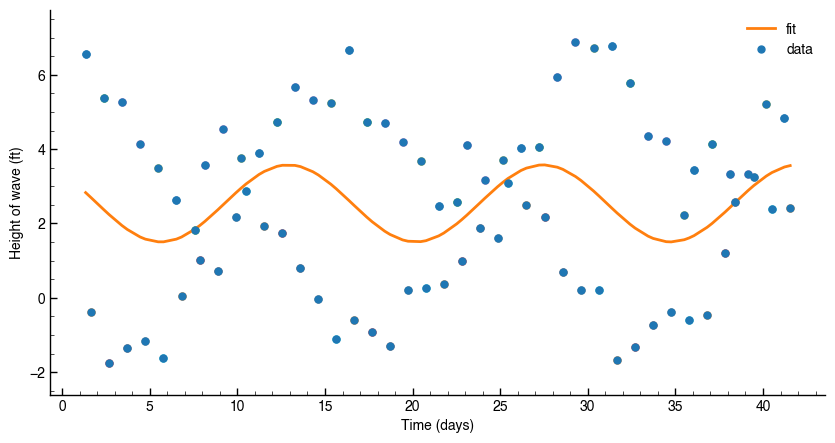

In [3]:
#create a figure
fig = plt.figure(figsize=(10,5))
ax = plt.subplot
plt.xlabel('Time (days)')
plt.ylabel('Height of wave (ft)')

#create empty lists for x and y variables
result_x = []
result_y = []

#converting data & putting into the lists
for item in test_data:
    day = item [0]
    time = item [1].decode()
    height = item [2]
    Day = (day)
    TimeParts = time.split(":")
    daysfromhour = int(TimeParts[0])/24
    daysfromminutes = int(TimeParts[1])/60/24
    timeindays = day + daysfromhour + daysfromminutes
    x = timeindays
    y = height
    result_x.append(x)
    result_y.append(y)
    plt.scatter(x,y)

#converting result lists into arrays
result_x = np.asarray(result_x)
result_y = np.asarray(result_y)


#fitting a curve to the data

#define the function to fit
def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

#perform the fit
params, params_cov = optimize.curve_fit(f_line, result_x, result_y, p0=[3, 0.5, 1, 2])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

y_fit = a_fit * np.sin(b_fit*result_x + c_fit) + d_fit


#plot the fit on the figure
plt.errorbar(result_x, result_y, fmt='o', label='data')
plt.plot(result_x, y_fit, label='fit')
plt.legend(loc=0, frameon=False)
plt.show()     #delete later

#save the figure as a PDF
#plt.savefig('project-figure.pdf', bbox_inches='tight', dpi=600, facecolor='white')

### playing around with params

#define the filename
fname = 'Downloads/ASTR19_S22_group_project_data.txt'

#open the file with numpy loadtxt
test_data = np.loadtxt(fname, dtype={'names': ('day', 'time', 'height'),'formats': ('i4', 'S5', 'f4')})

plt.style.use("Downloads/astr19_matplotlib_defaults.txt")
fig = plt.figure(figsize=(10,5))
ax = plt.subplot
plt.xlabel('Time (days)')
plt.ylabel('Height of wave (ft)')


result_x = []
result_y = []
for item in test_data:
    day = item [0]
    time = item [1].decode()
    height = item [2]
    Day = (day)
    TimeParts = time.split(":")
    daysfromhour = int(TimeParts[0])/24
    daysfromminutes = int(TimeParts[1])/60/24
    timeindays = day + daysfromhour + daysfromminutes
    x = timeindays
    y = height
    result_x.append(x)
    result_y.append(y)
    plt.scatter(x,y)

result_x = np.asarray(result_x)
result_y = np.asarray(result_y)

#curve fitting???

#define the function to fit
def f_line(x, a, b, c, d,e,f,g,h,i,j,k,l, m):
    return (a * np.sin(b*x + c) + d) + (e * np.sin(f*x + g) + h) * (i * np.sin(j*x + k) + l) + m

#perform the fit
params, params_cov = optimize.curve_fit(f_line, result_x, result_y, p0=[6, 0.5, 1, 5, 2, 2, 2, 1, 4, 5, 6, 2, 3])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
e_fit = params[4]
f_fit = params[5]
g_fit = params[6]
h_fit = params[7]
i_fit = params[8]
j_fit = params[9]
k_fit = params[10]
l_fit = params[11]
m_fit = params[12]

y_fit = (a_fit * np.sin(b_fit*result_x + c_fit) + d_fit) + (e_fit * np.sin(f_fit*result_x + g_fit) + h_fit) * (i_fit * np.sin(j_fit*result_x + k_fit) + l_fit) + m_fit

#plot the fit on the same graph
plt.errorbar(result_x, result_y, fmt='o', label='data')
plt.plot(result_x, y_fit, label='fit')
plt.legend(loc=0, frameon=False)
plt.show() 

### using tensorflow??

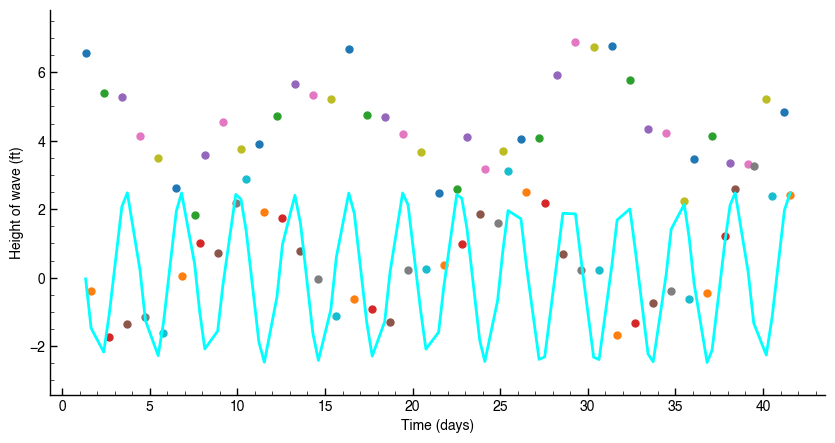

In [21]:
#define the filename
fname = 'Downloads/ASTR19_S22_group_project_data.txt'

#open the file with numpy loadtxt
test_data = np.loadtxt(fname, dtype={'names': ('day', 'time', 'height'),'formats': ('i4', 'S5', 'f4')})

plt.style.use("Downloads/astr19_matplotlib_defaults.txt")
fig = plt.figure(figsize=(10,5))
ax = plt.subplot
plt.xlabel('Time (days)')
plt.ylabel('Height of wave (ft)')


result_x = []
result_y = []
for item in test_data:
    day = item [0]
    time = item [1].decode()
    height = item [2]
    Day = (day)
    TimeParts = time.split(":")
    daysfromhour = int(TimeParts[0])/24
    daysfromminutes = int(TimeParts[1])/60/24
    timeindays = day + daysfromhour + daysfromminutes
    x = timeindays
    y = height
    result_x.append(x)
    result_y.append(y)
    plt.scatter(x,y)

result_x = np.asarray(result_x)
result_y = np.asarray(result_y)




#amplitude
A_init = 2.0
A_fit = tf.Variable(A_init, name='amplitude')
#frequency
f_init = 2.0
f_fit = tf.Variable(f_init, name='frequency')
#phase
p_init = 0.5
p_fit = tf.Variable(p_init, name='phase')


#sinusoidal curve
def sinusoid(x, A, f, p):
    return A*np.sin(f*x+p)

#define the sinusoidal model
@tf.function
def sinusoidal_model(result_x):
    return A_fit * tf.math.sin(f_fit*x + p_fit)


#define the loss function
@tf.function
def mse(y_true, y_pred):
    #mse between true and predicted values
    return tf.losses.mean_squared_error(y_true, y_pred)


#Adam optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)


#start training
epochs = 5000     #number of epochs to run
display_step = 1000    #number of epochs between printing info to screen
for epoch in range(epochs):
    #monitor training/display steps
    if((epoch%display_step)==0):
        pred = sinusoidal_model(result_x)
        loss = mse(pred, result_y)
        #to print this info, we need to convert to numpy arrays
        #print(f'Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p: {p_fit.numpy()}')
    #in TF2, gradients are handled using the GradientTape class.
    #begin GradientTape and optimize
    with tf.GradientTape() as g:
        pred = sinusoidal_model(result_x)
        loss = mse(result_y, pred)
    #compute dm, db, the gradients with respect to m_fit and b_fit
    gradients = g.gradient(loss, [A_fit, f_fit, p_fit])
    #update m_fit adn b_fit with the gradients x learning
    optimizer.apply_gradients(zip(gradients, [A_fit, f_fit, p_fit]))
#print the last answer
#print(f'Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p: {p_fit.numpy()}')
#print("Done!")


x_model = np.sort(result_x)
y_model = sinusoid(x_model, A_fit, f_fit, p_fit)

plt.plot(x_model, y_model, color='cyan', label='BFM')


#f, ax = plt.subplots(1, 1, figsize=(10,5))
#plt.errorbar(result_x, result_y, fmt='o', label='Data')
#ax.plot(x_model, y_model, color='magenta', label='Best-fit model')
#plt.set_xlim([-0.1,10.1])
#plt.set_ylim([-2.,2])
#ax.text(0.5, 1.2, r'$\sigma = 1$', color='0', fontsize=32)
#ax.set_xlabel('x', fontsize=20)
#ax.set_ylabel('y', fontsize=20)
#plt.legend(frameon=False, fontsize=20, handletextpad=0)